# 0. Initialization

In [39]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('../data/Clicked Ads Dataset.csv', sep=',')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


# 1. Eksploratory Data Analysis

## 1.1 Quick EDA

In [25]:
# Informasi dataset
print("Info Dataset:")
print(f"Jumlah baris : {df.shape[0]}")
print(f"Jumlah kolom : {df.shape[1]}")

Info Dataset:
Jumlah baris : 1000
Jumlah kolom : 11


In [26]:
# Informasi kolom
print("Info Kolom:")
print(df.info())

Info Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB
None


- Terdapat kolom yang tidak memiliki nama.

In [27]:
# Pengecekan data yang hilang
print("\nPengecekan Missing Values:")
df.isnull().sum()


Pengecekan Missing Values:


Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

- Pada kolom 'Daily Time Spent on Site' terdapat 13 data yang missing value. 
- Pada kolom 'Area Income' terdapat 13 data yang missing value. 
- Pada kolom 'Daily Internet Usage' terdapat 13 data yang missing value. 
- Pada kolom 'Male' terdapat 3 data yang missing value. 

In [28]:
# Pengecekan data yang duplicate
print("\nPengecekan Data Duplicate:")
df.duplicated().value_counts()


Pengecekan Data Duplicate:


False    1000
Name: count, dtype: int64

- Tidak ada data yang duplicate.

## 1.2 Statistical Summaries

In [29]:
# Feature numerical & categorical
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
categorical_features = ['Male', 'city', 'province', 'category']

In [30]:
# Statistical summaries feature numerical
df[numerical_features].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,987.000000,1000.000000,9.870000e+02,989.000000
mean,64.929524,36.009000,3.848647e+08,179.863620
std,15.844699,8.785562,9.407999e+07,43.870142
min,32.600000,19.000000,9.797550e+07,104.780000
25%,51.270000,29.000000,3.286330e+08,138.710000
50%,68.110000,35.000000,3.990683e+08,182.650000
75%,78.460000,42.000000,4.583554e+08,218.790000
max,91.430000,61.000000,5.563936e+08,267.010000


- Mayoritas pengguna berada di situs antara 51.27 dan 78.46 menit per hari (dari persentil 25% hingga 75%).

- Pengguna situs mayoritas berusia antara 29 dan 42 tahun (dari persentil 25% hingga 75%). Ini mengindikasikan bahwa situs tersebut cenderung menarik perhatian kelompok usia dewasa muda hingga dewasa pertengahan.

- Pengguna berasal dari wilayah dengan tingkat ekonomi yang bervariasi, tetapi mayoritas berada di wilayah dengan pendapatan antara 328 juta hingga 458 juta.

- Sebagian besar pengguna menggunakan internet antara 138.71 hingga 218.79 menit per hari (persentil 25% hingga 75%). Ini mengindikasikan bahwa kebanyakan pengguna cukup aktif di internet dengan penggunaan internet harian yang tinggi.

In [31]:
# Statistical summaries feature categorical
df[categorical_features].describe()

,Male,city,province,category
count,997,1000,1000,1000
unique,2,30,16,10
top,Perempuan,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,64,253,112


- Mayoritas pengguna adalah perempuan, sekitar 52% dari total data. Ini menunjukkan bahwa perempuan mungkin lebih banyak berinteraksi dengan situs atau iklan, yang bisa jadi pertimbangan dalam strategi marketing perusahaan.

- Asal kota pengguna yang paling banyak adalah pengguna yang berasal dari Surabaya, diikuti oleh kota-kota lain.

- Asal provinsi pengguna terbanyak yakni pengguna dari provinsi dari DKI Jakarta.

- Kategori iklan Otomotif adalah yang paling sering dilihat atau diklik oleh pengguna.

## 1.3 Univariate Analysis

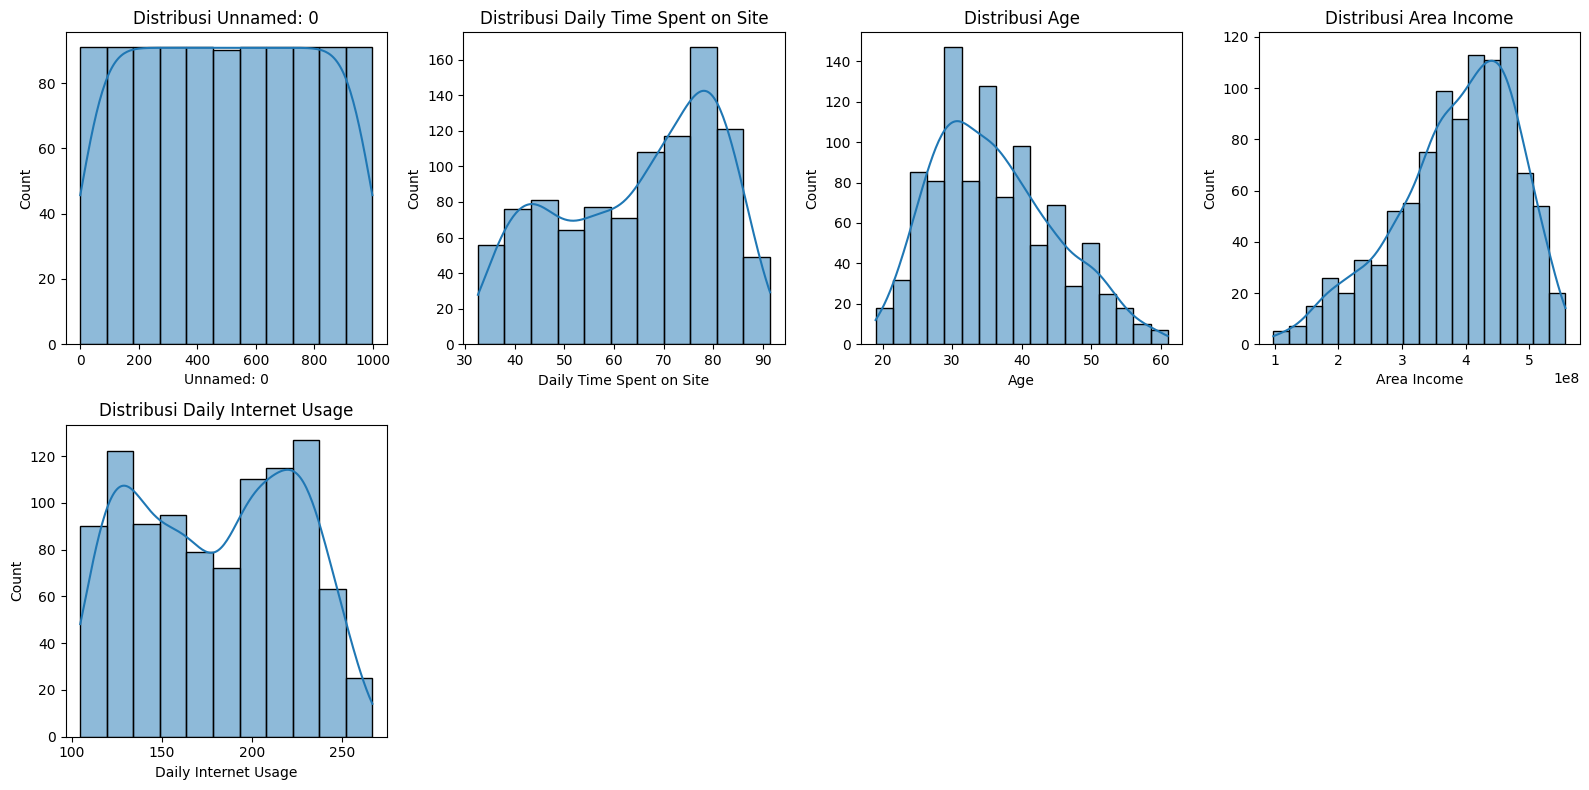

In [40]:
# Univariate Analysis for Numeric Variables

# Mengambil fitur numerik
numeric_features = df.select_dtypes(include=[np.number])

# Menentukan ukuran grid untuk subplot secara dinamis
num_features = len(numeric_features.columns)
cols = 4
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 4, rows * 4))
for i, column in enumerate(numeric_features.columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

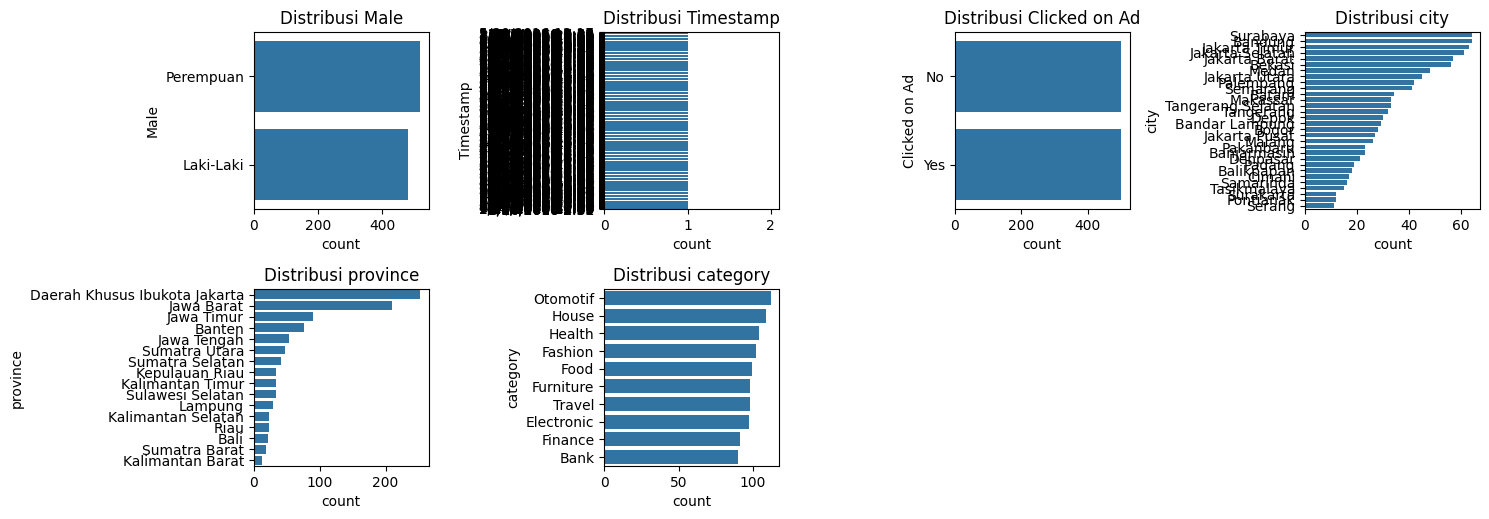

In [41]:
# Univariate Analysis for Categorical Variables
categorical_features = df.select_dtypes(include=[object])
plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_features.columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

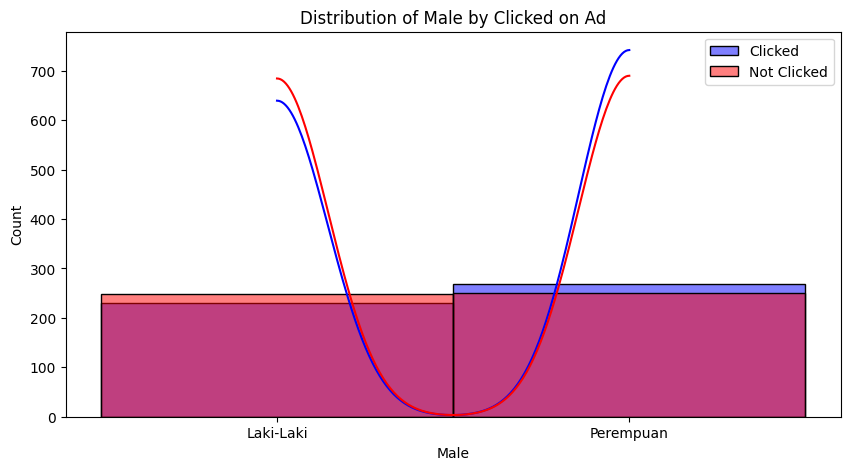

In [45]:
# Visualisasi distribusi fitur Male untuk user yang mengklik dan tidak mengklik iklan
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Clicked on Ad'] == 'Yes']['Male'], color='blue', label='Clicked', kde=True)
sns.histplot(df[df['Clicked on Ad'] == 'No']['Male'], color='red', label='Not Clicked', kde=True)
plt.legend()
plt.title('Distribution of Male by Clicked on Ad')
plt.show()

### 1.3.1 Feature Age

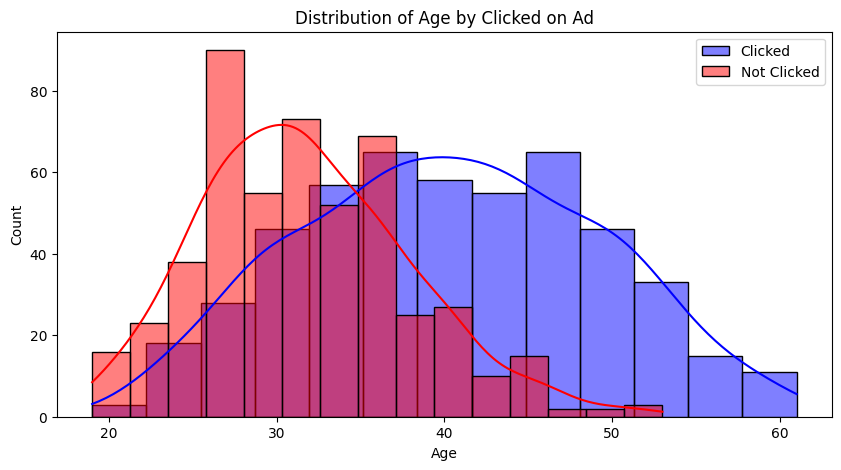

In [32]:
# Visualisasi distribusi fitur Age untuk user yang mengklik dan tidak mengklik iklan
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Clicked on Ad'] == 'Yes']['Age'], color='blue', label='Clicked', kde=True)
sns.histplot(df[df['Clicked on Ad'] == 'No']['Age'], color='red', label='Not Clicked', kde=True)
plt.legend()
plt.title('Distribution of Age by Clicked on Ad')
plt.show()

- Kelompok usia muda (di bawah 30 tahun) cenderung tidak mengklik iklan lebih sering dibandingkan dengan kelompok usia lainnya. Ini bisa jadi karena mereka lebih akrab dengan iklan digital dan lebih memilih untuk tidak mengkliknya.

- Pengguna yang lebih tua, terutama di rentang usia 30-50 tahun, lebih mungkin untuk mengklik iklan dibandingkan dengan kelompok usia muda. Ini mungkin karena mereka lebih tertarik pada produk atau layanan yang dipromosikan, atau mereka memiliki pola perilaku online yang berbeda dari kelompok usia muda.

### 1.3.2 Feature Daily Internet Usage

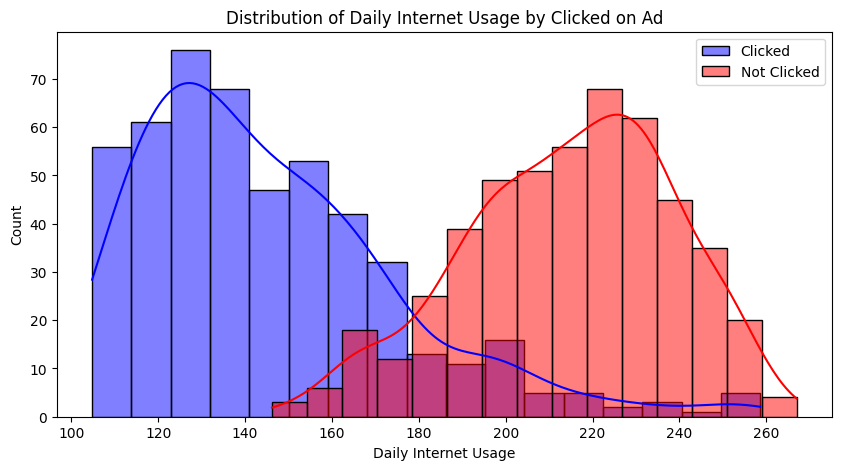

In [33]:
# Visualisasi distribusi fitur Daily Internet Usage untuk user yang mengklik dan tidak mengklik iklan
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Clicked on Ad'] == 'Yes']['Daily Internet Usage'], color='blue', label='Clicked', kde=True)
sns.histplot(df[df['Clicked on Ad'] == 'No']['Daily Internet Usage'], color='red', label='Not Clicked', kde=True)
plt.legend()
plt.title('Distribution of Daily Internet Usage by Clicked on Ad')
plt.show()

- Pengguna yang menggunakan internet per harinya di bawah 180 menit lebih sering mengklik iklan dibangingkan pengguna yang menggunakan internet per harinya di atas 180 menit. Ini menunjukkan bahwa semakin lama menggunakan internet per harinya bukan berarti pengguna akan mengklik iklan.

### 1.3.3 Feature Daily Time Spent on Site

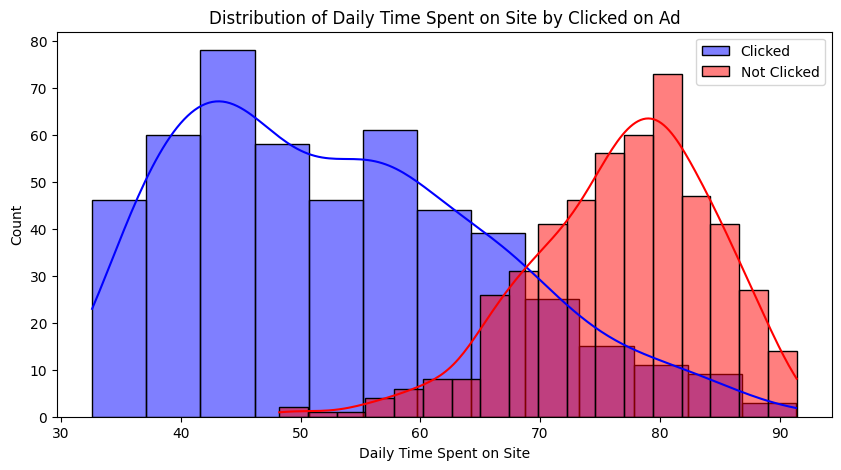

In [34]:
# Visualisasi distribusi fitur Daily Time Spent on Site untuk user yang mengklik dan tidak mengklik iklan
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Clicked on Ad'] == 'Yes']['Daily Time Spent on Site'], color='blue', label='Clicked', kde=True)
sns.histplot(df[df['Clicked on Ad'] == 'No']['Daily Time Spent on Site'], color='red', label='Not Clicked', kde=True)
plt.legend()
plt.title('Distribution of Daily Time Spent on Site by Clicked on Ad')
plt.show()

- Pengguna yang menghabiskan waktu di situs kurang dari 70 menit lebih sering mengklik iklan dibandingkan yang lebih dari 70 menit. Hal ini mungkin dikarenakan pengguna yang lama dalam mengunjungi situs cenderung lebih fokus dengan apa yang ada di situs sehingga tidak mengklik iklan.

## 1.4 Bivariate Analysis

### 1.4.1 Age vs Daily Internet Usage

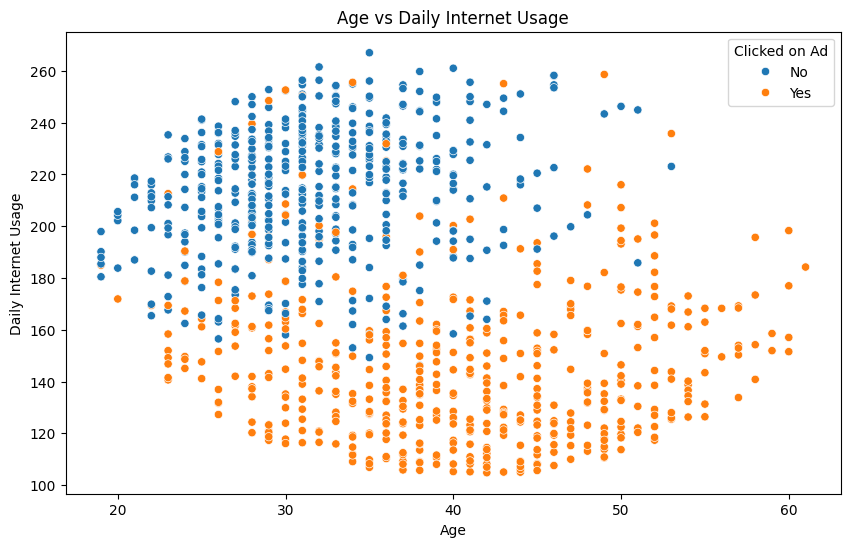

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Daily Internet Usage', hue='Clicked on Ad', data=df)
plt.title('Age vs Daily Internet Usage')
plt.show()

- Titik-titik data tersebar cukup merata tanpa membentuk pola garis atau kurva yang jelas. Ini mengindikasikan bahwa tidak ada hubungan linier yang kuat antara usia dan penggunaan internet harian dalam menentukan apakah seseorang akan mengklik iklan atau tidak.

- Kedua kelompok pengguna (yang mengklik dan tidak mengklik iklan) memiliki rentang usia dan penggunaan internet harian yang sangat mirip. Terdapat banyak tumpang tindih antara kedua kelompok ini.

- Baik pengguna yang mengklik maupun tidak mengklik iklan cenderung memiliki distribusi usia dan penggunaan internet harian yang relatif seragam dalam rentang tertentu.

### 1.4.2 Daily Internet Usage vs Daily Time Spent on Site

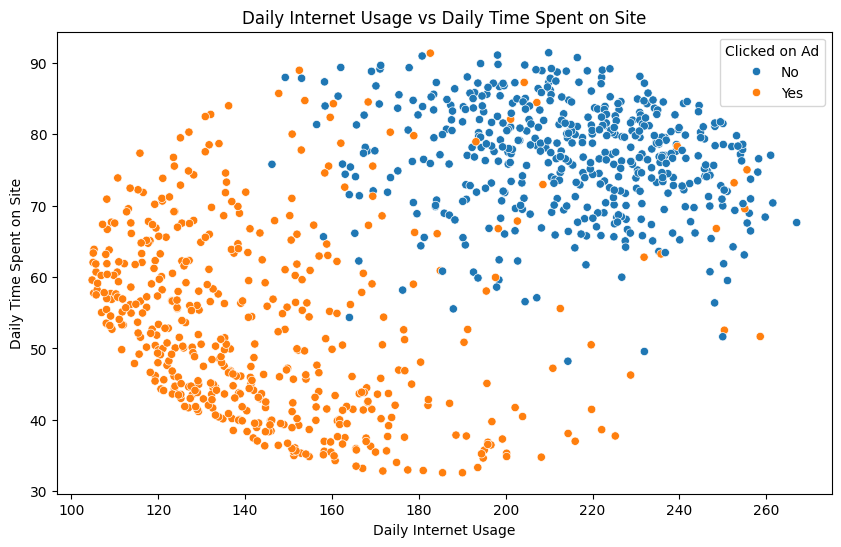

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Daily Internet Usage', y='Daily Time Spent on Site', hue='Clicked on Ad', data=df)
plt.title('Daily Internet Usage vs Daily Time Spent on Site')
plt.show()

- Titik-titik data tersebar cukup merata tanpa membentuk pola garis atau kurva yang jelas. Ini mengindikasikan bahwa tidak ada hubungan linier yang kuat antara penggunaan internet harian dan waktu yang dihabiskan di situs dalam menentukan apakah seseorang akan mengklik iklan atau tidak.

- Kedua kelompok pengguna (yang mengklik dan tidak mengklik iklan) memiliki rentang penggunaan internet harian dan waktu di situs yang sangat mirip. Terdapat banyak tumpang tindih antara kedua kelompok ini.

- Baik pengguna yang mengklik maupun tidak mengklik iklan cenderung memiliki distribusi penggunaan internet harian dan waktu di situs yang relatif seragam dalam rentang tertentu.

### 1.4.3 Age vs Daily Time Spent on Site

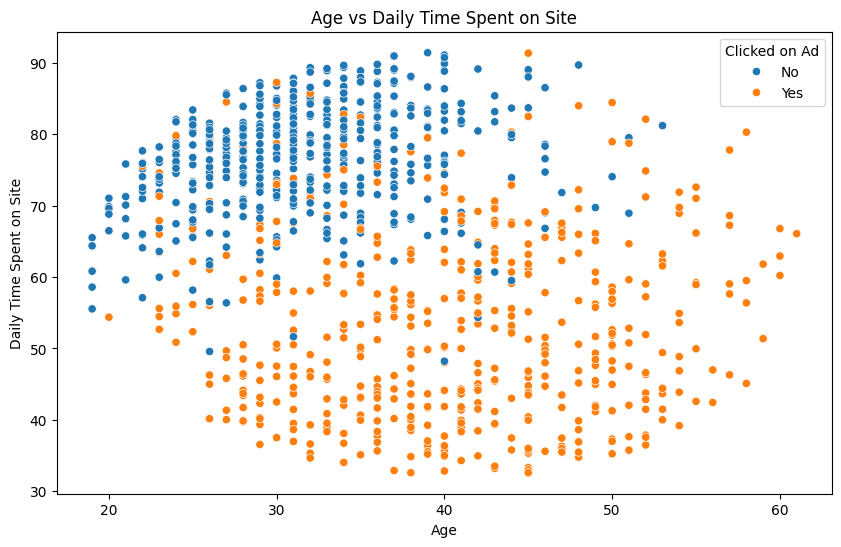

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad', data=df)
plt.title('Age vs Daily Time Spent on Site')
plt.show()

- Titik-titik data tersebar cukup merata tanpa membentuk pola garis atau kurva yang jelas. Ini mengindikasikan bahwa tidak ada hubungan linier yang kuat antara usia dan waktu yang dihabiskan di situs dalam menentukan apakah seseorang akan mengklik iklan atau tidak.

- Kedua kelompok pengguna (yang mengklik dan tidak mengklik iklan) memiliki rentang usia dan waktu di situs yang sangat mirip. Terdapat banyak tumpang tindih antara kedua kelompok ini.

- Baik pengguna yang mengklik maupun tidak mengklik iklan cenderung memiliki distribusi usia dan waktu di situs yang relatif seragam dalam rentang tertentu.

## 1.5 Multivariate Analysis

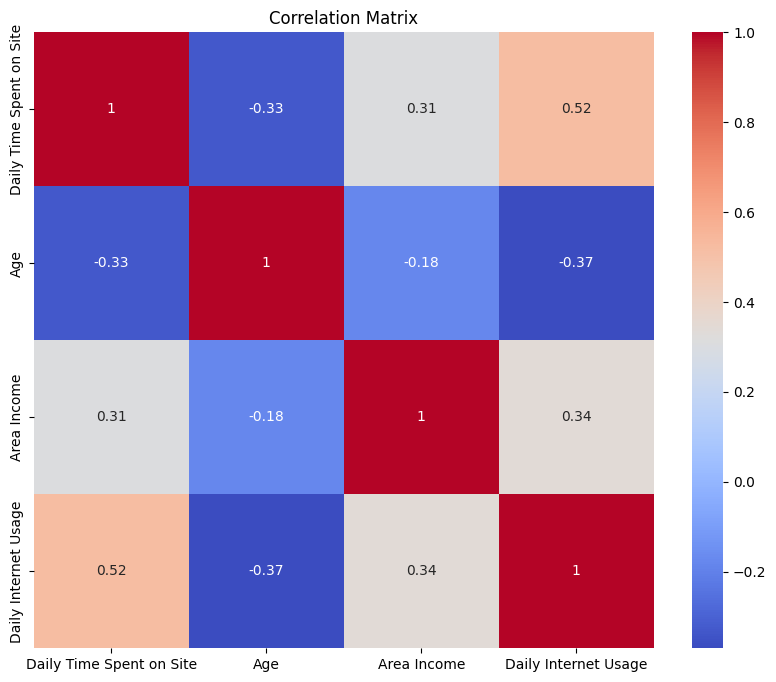

In [38]:
# Hitung korelasi antara variabel numerik
corr = df[numerical_features].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Daily Time Spent on Site dan Daily Internet Usage memiliki korelasi positif yang kuat (0.52). Ini menunjukkan bahwa semakin banyak waktu yang dihabiskan seseorang di situs, semakin tinggi pula penggunaan internet harian mereka.

- Age dan Daily Internet Usage memiliki korelasi negatif (-0.37). Ini berarti bahwa seiring bertambahnya usia, cenderung ada penurunan dalam penggunaan internet harian. Ini mungkin menunjukkan perubahan kebiasaan penggunaan internet seiring bertambahnya usia.

- Age dan Daily Time Spent on Site juga memiliki korelasi negatif (-0.33). Ini menunjukkan tren yang serupa, yaitu semakin tua seseorang, semakin sedikit waktu yang mereka habiskan di situs tertentu.

- Area Income memiliki korelasi yang relatif lemah dengan fitur lainnya. Ini menunjukkan bahwa pendapatan tidak memiliki hubungan yang kuat dengan fitur-fitur numerical lainnya.